# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import os
import json

# importing csv
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# Download file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
response = requests.get(url)
response

<Response [200]>

In [6]:
# save to file
with open(os.path.join(url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [7]:
# convert to pandas dataframe
df2 = pd.read_csv("image_predictions.tsv", sep="\t") 
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Access the Twitter API 
consumer_key = 'SbnmSKqvYvN4tgXNkSKc1jFIW'
consumer_secret = 'MSxD6fRR4TvxqATCIncuy2e9fzkvihDH2aNDnDxyiNABywBd83'
access_token = '873955165036044292-qqxEQb8LvQXSKNSNV3NK3D7Cf47Mx6q'
access_secret = 'jbImGauy2yT0zMhPDJqavoxvdyu0YaEiZ9aPY7sC0x1kl'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [9]:
api = tweepy.API(auth,
                wait_on_rate_limit = True, 
                wait_on_rate_limit_notify = True)

In [10]:
list_of_tweets = []
missing_ids = []

for tweet_id in df['tweet_id']:
    try:
        list_of_tweets.append(api.get_status(tweet_id)._json)
    except:
        missing_ids.append((tweet_id))

Rate limit reached. Sleeping for: 749
Rate limit reached. Sleeping for: 749


In [11]:
with open('tweet_json.txt', 'w') as file:
        json.dump(list_of_tweets, file)

In [12]:
list_keys = ['tweet_id', 'retweet_count', 'favorite_count']
new_dict = {new_list: [] for new_list in list_keys}

with open('tweet_json.txt', encoding='utf-8') as json_tweets:  
    tweets = json.load(json_tweets)
    for i in tweets:
        tweet_id = i['id']
        retweet_count = i['retweet_count']
        favorite_count = i['favorite_count']
        new_dict['tweet_id'].append(tweet_id)
        new_dict['retweet_count'].append(retweet_count)
        new_dict['favorite_count'].append(favorite_count)

In [13]:
df3 = pd.DataFrame.from_dict(new_dict)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [14]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Lola           10
Tucker         10
Penny          10
Bo              9
Winston         9
the             8
Sadie           8
Toby            7
Bailey          7
an              7
Daisy           7
Buddy           7
Scout           6
Stanley         6
Leo             6
Rusty           6
Milo            6
Jack            6
Dave            6
Oscar           6
Bella           6
Jax             6
Koda            6
Louis           5
             ... 
Chaz            1
Barney          1
Rooney          1
Shnuggles       1
Fiji            1
Fillup          1
Lizzie          1
Tobi            1
officially      1
Snickers        1
Lilli           1
Coopson         1
Harvey          1
Nigel           1
Rose            1
Anthony         1
Banjo           1
Timofy          1
Josep           1
Torque          1
Tupawc          1
Pubert          1
Beebop          1
Lorelei         1
Tater     

In [16]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [17]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df.shape

(2356, 17)

In [21]:
df.tweet_id.duplicated().sum()

0

In [22]:
df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [24]:
print(df2.p1_dog.value_counts())
print(df2.p2_dog.value_counts())
print(df2.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [27]:
df2.shape

(2075, 12)

In [28]:
df2.duplicated().sum()

0

In [29]:
df2.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [30]:
df3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7100,34215
1,892177421306343426,5350,29677
2,891815181378084864,3520,22345
3,891689557279858688,7303,37390
4,891327558926688256,7847,35742
5,891087950875897856,2636,18042
6,890971913173991426,1686,10502
7,890729181411237888,15968,57547
8,890609185150312448,3662,24840
9,890240255349198849,6170,28315


In [31]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [32]:
df3.describe()

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2504.433606,7140.284057
std,6.820795e+16,4240.268583,11091.183519
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,503.000000,1240.000000
50%,7.178418e+17,1165.000000,3084.000000
75%,7.986547e+17,2898.000000,8716.000000
max,8.924206e+17,71731.000000,146522.000000


In [33]:
df3.shape

(2327, 3)

In [34]:
df3.duplicated().sum()

0

In [35]:
df3.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

### Quality issues
1. Change incorrect data types

2. Retweet_count and favorite_count should be integers, not floats

3. Drop columns with missing values

4. A number of dog pics do not represent a dog

5. A number of rows are retweets. Retweets will be dropped

6. Drop uncessary columns

7. Remove colums with the wrong names (start with lower case letters)

8. Fix wrong extraction of ratings, especially decimals. 

### Tidiness issues
1. Convert dog stages in one column

2. We now have three different data sets. These will need to be concatenated

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [462]:
# Make copies of original pieces of data
df_clean = df
df2_clean = df2
df3_clean = df3

In [463]:
# Change tweet_id columns to string and merge all dataframes

df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df2_clean['tweet_id'] = df2_clean['tweet_id'].astype(str)
df3_clean['tweet_id'] = df3_clean['tweet_id'].astype(str)

df_new = df_clean.merge(df2_clean,on='tweet_id').merge(df3_clean,on='tweet_id')

In [464]:
df_new.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1712,672267570918129665,NaN,NaN,2015-12-03 04:14:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you accidentally open up the front facing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672267570...,...,0.716932,True,miniature_pinscher,0.051234,True,Airedale,0.044381,True,546,1335
200,843856843873095681,NaN,NaN,2017-03-20 16:08:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Sadie and Daisy. They do all thei...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/843856843...,...,0.922540,True,golden_retriever,0.074358,True,Great_Pyrenees,0.002325,True,4233,20230
1385,683142553609318400,NaN,NaN,2016-01-02 04:27:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Brandy. She's a member of the Bloods. Men...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683142553...,...,0.605851,True,chow,0.183470,True,German_shepherd,0.079662,True,957,2682


In [465]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
tweet_id                      2057 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
jpg_url                       2057

### Issue #1:

#### Define:

1. Tweet ID / In_reply_to_status_id is of type int. This will be converted to string

#### Code

In [466]:
df_new['tweet_id'] = df_new['tweet_id'].astype(str)

In [467]:
df_new['in_reply_to_status_id'] = df_new['in_reply_to_status_id'].astype(str)

In [468]:
df_new['in_reply_to_user_id'] = df_new['in_reply_to_user_id'].astype(str)

In [469]:
df_new['timestamp'] = pd.to_datetime(df_new['timestamp'])

#### Test

In [470]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
tweet_id                      2057 non-null object
in_reply_to_status_id         2057 non-null object
in_reply_to_user_id           2057 non-null object
timestamp                     2057 non-null datetime64[ns]
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
jpg_url                 

### Issue #2:

#### Define:

1. Retweet_count and favorite_count should be integers, not floats

#### Code

In [471]:
df_new = df_new.dropna(subset = ['retweet_count'])
df_new = df_new.dropna(subset = ['favorite_count'])

df_new['retweet_count'] = df_new['retweet_count'].astype(int)
df_new['favorite_count'] = df_new['favorite_count'].astype(int)

#### Test

In [472]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 30 columns):
tweet_id                      2057 non-null object
in_reply_to_status_id         2057 non-null object
in_reply_to_user_id           2057 non-null object
timestamp                     2057 non-null datetime64[ns]
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
jpg_url                 

### Issue #3:

#### Define:

3. Drop rows with missing values

#### Code

In [473]:
df_new = df_new.dropna(subset=['expanded_urls'])
df_new = df_new.dropna(subset=['p1'])
df_new = df_new.dropna(subset=['tweet_id'])

#### Test

In [474]:
df_new['expanded_urls'].isna().sum()

0

### Issue #4:


#### Define:

1. Drop tweets that are not dogs according to the algorithm

#### Code

In [475]:
df_new = df_new.drop(df_new[df_new['p1_dog'] == False].index)

#### Test

In [476]:
df_new[df_new['p1_dog'] == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


### Issue #5: 

#### Define:

5. Drop retweets

#### Code

In [477]:
df_new = df_new.drop(df_new[df_new['retweeted_status_id'].isna() == False].index)

#### Test

In [478]:
df_new['retweeted_status_id'].value_counts().sum()

0

### Issue #6: 

#### Define:

1. Drop uncessary columns

#### Code

In [479]:
df_new = df_new.drop(['in_reply_to_status_id',
                      'in_reply_to_user_id',
                      'source',
                      'jpg_url',
                     'img_num',
                     'p1_conf',
                      'p1_dog',
                      'p2',
                     'p2_conf',
                     'p2_dog',
                      'p3',
                     'p3_dog',
                     'p3_conf'], axis=1)

#### Test

In [480]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Issue #7: 

#### Define:

1. Remove colums with the wrong names (start with lower case letters)

#### Code

In [481]:
count = 0
index_pos = []

for index in df_new.name.index:
    if df_new.name[index][0].islower() == True:
        index_pos.append(count)
        count += 1
    else:
        count += 1


In [482]:
df_new.iloc[index_pos, df_new.columns.get_loc('name')] = None

#### Test

In [483]:
df_new.iloc[index_pos]

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,p1,retweet_count,favorite_count
50,881536004380872706,2017-07-02 15:32:16,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,None,None,None,pupper,None,Samoyed,13565,43962
152,855459453768019968,2017-04-21 16:33:22,"Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,None,None,None,None,None,Blenheim_spaniel,7386,27455
283,828650029636317184,2017-02-06 17:02:17,"Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,None,None,None,None,None,golden_retriever,1260,9083
428,806219024703037440,2016-12-06 19:29:28,We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,None,None,None,None,None,chow,1147,6220
635,772581559778025472,2016-09-04 23:46:12,Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,None,None,None,None,None,Newfoundland,1603,6197
678,765395769549590528,2016-08-16 03:52:26,This is my dog. Her name is Zoey. She knows I'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765395769...,13,10,None,None,None,None,None,Pembroke,3160,25450
795,748977405889503236,2016-07-01 20:31:43,What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,10,10,None,None,None,None,None,German_short-haired_pointer,3172,10168
807,747885874273214464,2016-06-28 20:14:22,This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,None,None,None,None,None,kuvasz,892,2752
809,747816857231626240,2016-06-28 15:40:07,Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,None,None,None,None,None,Pembroke,1078,4551
818,746872823977771008,2016-06-26 01:08:52,This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,None,None,None,None,None,Pembroke,1980,5651


### Issue #8: 

#### Define:

1. Fix wrong extraction of ratings

#### Code

In [484]:
import re 
df_new = df_new.reset_index(drop = True)

# converting numerator & denominator to float

df_new['rating_denominator'] = df_new['rating_denominator'].astype(float)
df_new['rating_numerator'] = df_new['rating_numerator'].astype(float)

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 17 columns):
tweet_id                      1469 non-null object
timestamp                     1469 non-null datetime64[ns]
text                          1469 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1469 non-null object
rating_numerator              1469 non-null float64
rating_denominator            1469 non-null float64
name                          1399 non-null object
doggo                         1469 non-null object
floofer                       1469 non-null object
pupper                        1469 non-null object
puppo                         1469 non-null object
p1                            1469 non-null object
retweet_count                 1469 non-null int64
favorite_count                1469 non-null int64
dtypes: datetime64[ns](1)

In [507]:
# finding actual numerator of tweets

tweet_id_list = []
text_list = []
actual_numerator = []  

for i in df_new[df_new.text.str.contains(r"(\d+\.\d*\/\d+)")].tweet_id:
    tweet_id_list.append(i)    
       
for text in df_new[df_new.text.str.contains(r"(\d+\.\d*\/\d+)")].text:
    text_list.append(text)

for i in text_list:
    actual_numerator.append(float(re.search('\d+\.\d+', i).group()))


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


In [558]:
# find index of tweets with wrong numerator

rows = []

for tweet in tweet_id_list:
    index_label = df_new[df_new['tweet_id'] == tweet].index.tolist()
    index_row = df_new.index.get_loc(index_label[0])
    rows.append(index_row)

In [560]:
# replace rows with wrong numerator

for row, numerator in zip(rows, actual_numerator):
    df_new.loc[row, 'rating_numerator'] = float(numerator)

#### Test

In [573]:
print(tweet_id_list, actual_numerator) 

['883482846933004288', '786709082849828864', '778027034220126208', '680494726643068929'] [13.5, 9.75, 11.27, 11.26]


In [574]:
df_new.loc[rows, 'rating_numerator']

35      13.50
404      9.75
443     11.27
1061    11.26
Name: rating_numerator, dtype: float64

### Issue #9 (tidyness):

#### Define: Convert dog stages in one column

#### Code

In [575]:
df_new['dog_stage'] = df_new['text'].str.extract('(doggo|floofer|pupper|puppo)')

df_new = df_new.drop(['doggo',
                      'floofer',
                      'pupper',
                      'puppo'], axis=1)


#### Test

In [577]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 14 columns):
tweet_id                      1469 non-null object
timestamp                     1469 non-null datetime64[ns]
text                          1469 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1469 non-null object
rating_numerator              1469 non-null float64
rating_denominator            1469 non-null float64
name                          1399 non-null object
p1                            1469 non-null object
retweet_count                 1469 non-null int64
favorite_count                1469 non-null int64
dog_stage                     236 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 160.8+ KB


In [582]:
df_new['dog_stage'].head(100)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7      doggo
8        NaN
9        NaN
10     puppo
11       NaN
12     puppo
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24    pupper
25       NaN
26       NaN
27       NaN
28       NaN
29       NaN
       ...  
70       NaN
71    pupper
72     doggo
73       NaN
74       NaN
75       NaN
76     puppo
77    pupper
78     doggo
79       NaN
80       NaN
81       NaN
82       NaN
83       NaN
84       NaN
85     doggo
86       NaN
87       NaN
88       NaN
89       NaN
90       NaN
91     puppo
92       NaN
93     puppo
94    pupper
95       NaN
96       NaN
97       NaN
98       NaN
99       NaN
Name: dog_stage, Length: 100, dtype: object

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [583]:
df_new.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [584]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 14 columns):
tweet_id                      1469 non-null object
timestamp                     1469 non-null datetime64[ns]
text                          1469 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1469 non-null object
rating_numerator              1469 non-null float64
rating_denominator            1469 non-null float64
name                          1399 non-null object
p1                            1469 non-null object
retweet_count                 1469 non-null int64
favorite_count                1469 non-null int64
dog_stage                     236 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
memory usage: 160.8+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [585]:
df_new.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,p1,retweet_count,favorite_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,Chihuahua,5350,29677,NaN


In [586]:
df_new['month'] = df_new['timestamp'].dt.month
df_new['year'] = df_new['timestamp'].dt.year
df_new['score'] = df_new['rating_numerator'] / df_new['rating_denominator']

df_new.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,p1,retweet_count,favorite_count,dog_stage,month,year,score
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,Chihuahua,5350,29677,NaN,8,2017,1.3


In [587]:
monthly_ranking = df_new.groupby(['month']).sum().sort_values('retweet_count')
monthly_ranking

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,year,score
month,,,,,,,,
8,0.0,0.0,496.00,440.0,112215,386375,88705,49.600000
9,0.0,0.0,545.27,490.0,134101,449412,98784,54.527000
10,0.0,0.0,572.75,490.0,156669,530230,98784,57.275000
4,0.0,0.0,885.00,810.0,206100,815650,153247,84.300000
11,0.0,0.0,2346.00,2352.0,236301,731323,475584,235.000000
3,0.0,0.0,1621.00,1460.0,257575,995090,256067,142.700000
5,0.0,0.0,861.00,730.0,259965,1027683,147201,86.100000
2,0.0,0.0,1602.00,1420.0,287155,1130539,272211,152.100000
7,0.0,0.0,1444.50,1250.0,372670,1625334,223820,129.050000


In [588]:
yearly_ranking = df_new.groupby(['year']).sum()
yearly_ranking

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,month,score
year,,,,,,,,
2015,0.0,0.0,4389.26,4432.0,337099,858940,5052,431.626000
2016,0.0,0.0,8874.02,8138.0,1613285,4987018,4097,817.048753
2017,0.0,0.0,3635.50,2910.0,1399447,6055140,1092,356.350000


In [589]:
correlation_score_retweets = df_new['score'].corr(df_new['retweet_count'])
correlation_score_retweets

0.29611222329149062

In [590]:
correlation_score_favorites = df_new['score'].corr(df_new['favorite_count'])
correlation_score_favorites

0.39564590051927101

### Insights:
1. The twitter page received the most retweets in 2016 by a wide marging. 2016 has also been the most successfull year in terms of favorite counts, yet the margin was much lower. 2015 has not been a successfull year.

2. Both retweets and favorites-counts are only low to modestly correlated with the dog score

3. The site receives the most retweets in December. The most likes are awared in June

In [591]:
df_new.head(1)

,tweet_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,p1,retweet_count,favorite_count,dog_stage,month,year,score
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,Chihuahua,5350,29677,NaN,8,2017,1.3


### Visualization

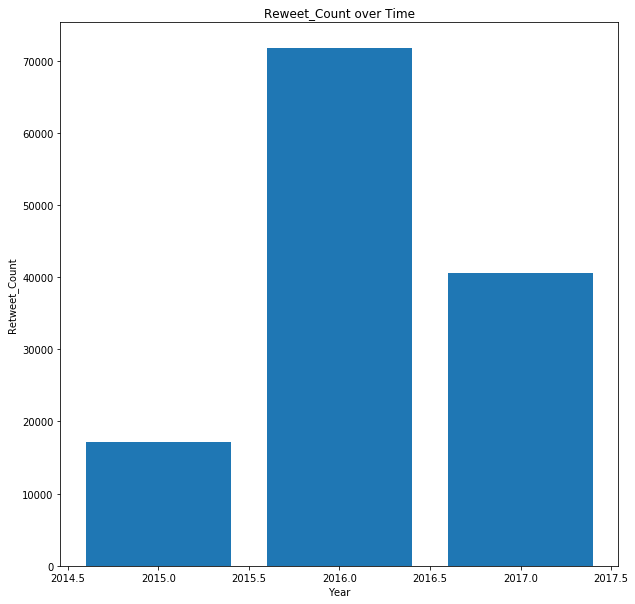

In [592]:
# Plotting year vs. retweet_count

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10));
plt.title('Reweet_Count over Time');
plt.xlabel('Year')
plt.ylabel('Retweet_Count')

plt.bar(df_new.year, df_new.retweet_count);